In [1]:
import cv2

import numpy as np

from matplotlib import pyplot as plt

def show_image(img, cmap=None):
    plt.imshow(img, cmap)
    plt.show()

lena = cv2.imread('lena.jpg')

height, width, channels = lena.shape

## Task 1.a

Дело в том, что человек может различать достаточно широкий диапозон яркостей. Но глаз так устроен, что моментально переключиться с очень ярких объектов на тусклые он не может. Зрачок в глазе человека играет роль диафрагмы, с помощью которой регулируется количество света, поподающего на сетчатку. Требуется время, чтобы кольцевые и радиальные мышцы изменили размер зрачка.

## Task 1.b

Очевидно, что между цветовыми пространствами есть обычная линейная зависимость. Для того, чтобы можно было переходить из одного пространства в другое, необходимо и достаточно, чтобы соответствующая СЛАУ всегда решалось, то есть коэффициенты $a_{ij}, 1 \leq i,j \leq 3$ должны образовывать обратимую матрицу (достаточно проверить детерминант).

### Task 1.b *

По всей видимости, нужно посмотреть на систему уравнений $X = A \cdot Y + B$. $B$ $-$ это сдвиг наших осей, $A$ $-$ поворот и растяжение. Понятно, что после линейных преобразований куба он может превратиться только в какой-то параллелипипед. Очевидно, что мы имеем дело с симплексом. А раз это симплекс, то мы можем анализировать только его вершины. Причем вершины исходного единичного куба будут переходить в вершины нового симплекса. А значит нужно лишь посмотреть на восемь значений в точках $(0, 0, 0), (0, 0, 1), (0, 1, 0), \ldots, (1, 1, 1)$, и если все новые значения лежат в нужных пределах, то всёновое пространство находится в этих пределах.


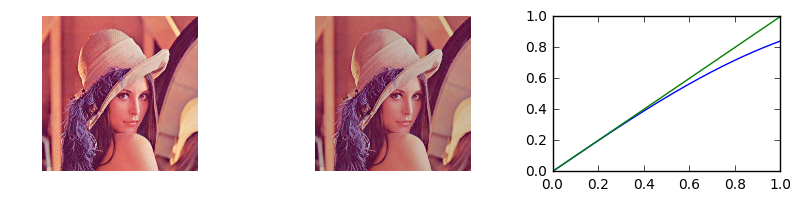

In [2]:
lena_f = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) / 255.0
lena_sin = np.sin(lena_f)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,2))
ax1.imshow(lena_f)
ax1.axis('off')
ax2.imshow(lena_sin)
ax2.axis('off')
x = np.linspace(0,1,1000)
y = np.sin(x)
ax3.plot(x, y, x, x)
plt.show()



## Task 1.c

Посмотрим на график синуса в пределах $[0, 1]$. Сразу видим, что он не особо отличается от функции $y = x$ и чем ближе к нулю, тем они больше совпадают. Далее замечаем, что график синуса всегда ниже указанной прямой. Таким образом, применив синус ко всем цветовым каналам, не яркие цвета мы практически не изменим, а яркие цвета станут тусклее. В целом, изменения будут не сильно заметны и выглядеть это будет так, как будто на изображении просто немного убрали яркость.

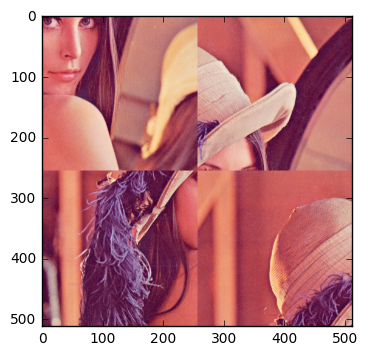

In [3]:
'''task 2.a'''
lena_mixed = np.copy(lena)
h1, w1 = height // 2, width // 2
lena11, lena22 = np.copy(lena[:h1, :w1]), np.copy(lena[h1:, w1:])
lena_mixed[:h1, :w1], lena_mixed[h1:, w1:] = lena22, lena11
cv2.imwrite('LenaMixed.jpg', lena_mixed)
show_image(cv2.cvtColor(lena_mixed, cv2.COLOR_BGR2RGB))

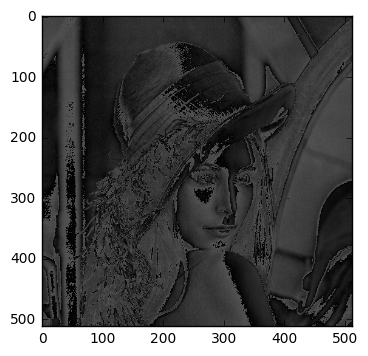

In [4]:
'''task 2.b'''
b, g, r = cv2.split(lena)
gray = (r+g+b) // 3
lena_gray = cv2.merge((gray, gray, gray))
cv2.imwrite('LenaGrayMean.jpg', lena_gray)
show_image(lena_gray)

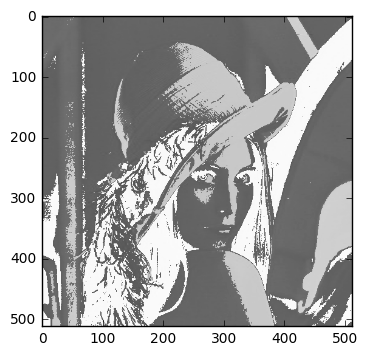

True

In [5]:
'''task 2.c'''
gray_diff = np.abs(cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) - gray)
show_image(gray_diff, cmap='Greys_r')
cv2.imwrite('LenaMeanDifference.jpg', gray_diff)

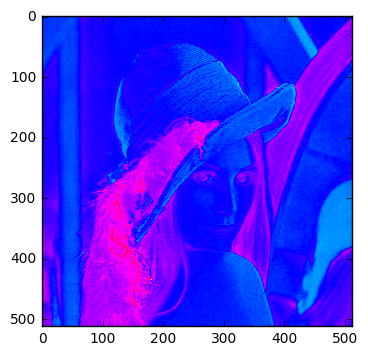

In [6]:
'''task 2.d'''
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(lena_hsv)
s.fill(np.max(s))
v.fill(np.max(v))
lena_MAXSV = cv2.cvtColor(cv2.merge((h, s, v)), cv2.COLOR_HSV2BGR)
cv2.imwrite('LenaMAXSV.jpg', lena_MAXSV)
show_image(lena_MAXSV)

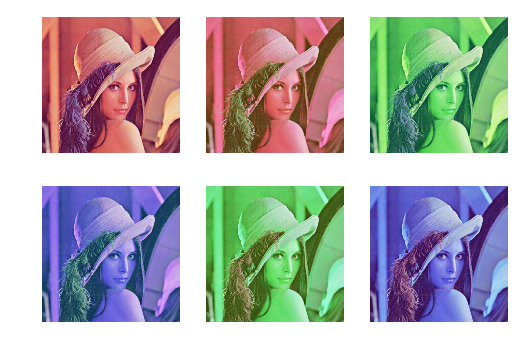

In [7]:
'''task 2.e'''
import itertools
b, g, r = cv2.split(lena)
colors = {'r':r, 'g':g, 'b':b}
f = plt.figure()
for i, comb in enumerate(itertools.permutations('rgb')):
    img = cv2.merge((colors[comb[0]], colors[comb[1]], colors[comb[2]]))
    cv2.imwrite('Lena_{}.jpg'.format(''.join(comb)), img)
    f.add_subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

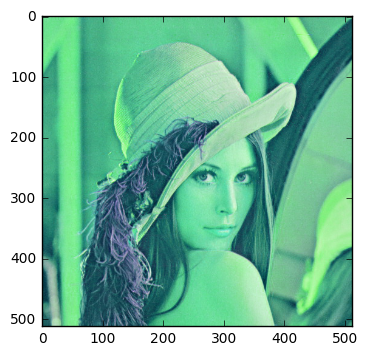

In [8]:
'''task 2.f'''
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(lena_hsv)
h = 255 - h
lena_hsv_inverted = cv2.cvtColor(cv2.merge((h, s, v)), cv2.COLOR_HSV2BGR)
cv2.imwrite('LenaInvertedHSV.jpg', lena_hsv_inverted)
show_image(cv2.cvtColor(lena_hsv_inverted, cv2.COLOR_BGR2RGB))

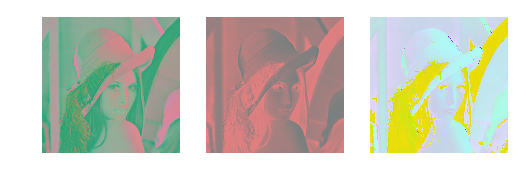

In [9]:
'''task 2.f'''
lena_lab_cv = cv2.cvtColor(lena, cv2.COLOR_BGR2Lab)

cvtMat = np.array([0.412453, 0.357580, 0.180423, 
                   0.212671, 0.715160, 0.072169, 
                   0.019334, 0.119113, 0.950227]).reshape(3, 3)

B, G, R = cv2.split(lena)

var_R = ( R / 255.0 )
var_G = ( G / 255.0 )
var_B = ( B / 255.0 )

def functionVectorizer(f):
    return np.vectorize(f, otypes=[np.float])

@functionVectorizer
def scaleOpt(t):
    if  t > 0.04045 :
        t = ( ( t + 0.055 ) / 1.055 ) ** 2.4
    else:
        t = t / 12.92
    return t * 100


var_R, var_G, var_B = scaleOpt([var_R, var_G, var_B])

X, Y, Z = cvtMat.dot([var_R.ravel(),var_G.ravel(),var_B.ravel()]).reshape(3,512,512)

@functionVectorizer
def scale(x):
    if x > 0.008856:
        x = x ** (1.0/3.0)
    else:
        x = 7.787 * x + 16. / 116.
    return x

        
var_X = scale(X / 95.047)
var_Y = scale(Y / 100.000)
var_Z = scale(Z / 108.883)
        
L = (( 116. * var_Y ) - 16.)
a = 500. * ( var_X - var_Y )
b = 200. * ( var_Y - var_Z )
        

lena_lab_my = cv2.merge((L.astype(int), a.astype(int), b.astype(int)))
        
f = plt.figure()
f.add_subplot(1, 3, 1)
plt.imshow(lena_lab_cv)
plt.axis('off')
f.add_subplot(1, 3, 3)
plt.imshow(lena_lab_my)
plt.axis('off')
f.add_subplot(1, 3, 2)
plt.imshow(np.abs(lena_lab_cv - lena_lab_my))
plt.axis('off')
plt.show()

